In [46]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
  
)

# For cleaner outputs
import warnings
warnings.filterwarnings('ignore')


In [9]:
iris=load_iris()
X=pd.DataFrame(iris.data,columns=iris.feature_names)
y=pd.Series(iris.target)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)


In [47]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [48]:
KNN=KNeighborsClassifier(n_neighbors=5,metric='euclidean',weights='uniform')

In [49]:
KNN.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [50]:
y_pred=KNN.predict(X_test)

In [51]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
classification=classification_report(y_test,y_pred,target_names=iris.target_names)
print(classification)



0.9736842105263158
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



Text(0.5, 36.72222222222221, 'Predicted Class')

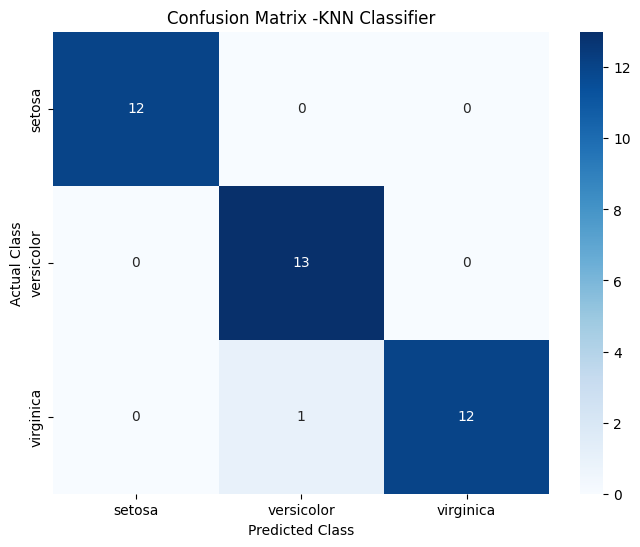

In [52]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.title('Confusion Matrix -KNN Classifier')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')


In [53]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


In [54]:

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search



,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [55]:
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate tuned model
best_knn = grid_search.best_estimator_
y_pred_tuned = best_knn.predict(X_test)
tuned_acc = accuracy_score(y_test, y_pred_tuned)
print("\nTuned Model Accuracy:", tuned_acc)



Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9549407114624506

Tuned Model Accuracy: 0.9736842105263158



📄 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



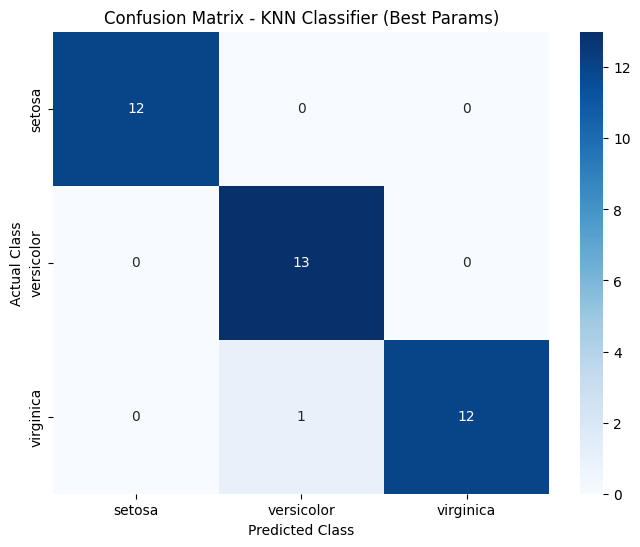

In [56]:
classification = classification_report(y_test, y_pred_tuned, target_names=iris.target_names)
print("\n📄 Classification Report:\n", classification)

# 🧮 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.title('Confusion Matrix - KNN Classifier (Best Params)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()
